# An√°lise Preditiva de Sucesso de Empresas

## Objetivo
Este notebook tem como objetivo desenvolver um modelo preditivo para determinar quais fatores influenciam o sucesso de empresas, utilizando t√©cnicas de machine learning e an√°lise explorat√≥ria de dados.

## Estrutura do Notebook
1. **Carregamento e Explora√ß√£o Inicial dos Dados**
2. **Limpeza e Tratamento de Dados**
3. **An√°lise Explorat√≥ria e Visualiza√ß√£o**
4. **Formula√ß√£o de Hip√≥teses**
5. **Engenharia de Features e Sele√ß√£o**
6. **Modelagem e Avalia√ß√£o**
7. **Otimiza√ß√£o de Hiperpar√¢metros**
8. **Resultados e Conclus√µes**

## Dataset
- **train.csv**: Dados de treinamento com features das empresas e target (labels)
- **test.csv**: Dados de teste para predi√ß√£o final
- **Target**: `labels` (0 = fracasso, 1 = sucesso)

## 1. Carregamento e Explora√ß√£o Inicial dos Dados

Vamos come√ßar carregando os dados e fazendo uma an√°lise inicial para entender a estrutura do dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Ver dimens√µes
print("Train:", train.shape)
print("Test:", test.shape)

# Olhar primeiras linhas
print(train.head())

# Ver estat√≠sticas gerais
print(train.describe(include="all"))
print(test.describe(include="all"))

Train: (646, 33)
Test: (277, 32)
    id  age_first_funding_year  age_last_funding_year  \
0  719                   10.42                  13.09   
1  429                    3.79                   3.79   
2  178                    0.71                   2.28   
3  197                    3.00                   5.00   
4  444                    0.66                   5.88   

   age_first_milestone_year  age_last_milestone_year  relationships  \
0                      8.98                    12.72              4   
1                       NaN                      NaN             21   
2                      1.95                     2.28              5   
3                      9.62                    10.39             16   
4                      6.21                     8.61             29   

   funding_rounds  funding_total_usd  milestones  is_CA  ...  is_consulting  \
0               3            4087500           3      1  ...              0   
1               1           45000000   

In [2]:
# AN√ÅLISE EXPLORAT√ìRIA INICIAL
# Verificar informa√ß√µes gerais dos dados
print("=== INFORMA√á√ïES GERAIS ===")
print("Train info:")
print(train.info())
print("\nTest info:")
print(test.info())

# Verificar valores ausentes
print("\n=== VALORES AUSENTES ===")
print("Train - valores nulos:")
print(train.isnull().sum())
print("\nTest - valores nulos:")
print(test.isnull().sum())

# Verificar duplicatas
print("\n=== DUPLICATAS ===")
print(f"Train duplicatas: {train.duplicated().sum()}")
print(f"Test duplicatas: {test.duplicated().sum()}")


=== INFORMA√á√ïES GERAIS ===
Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        646 non-null    int64  
 1   age_first_funding_year    611 non-null    float64
 2   age_last_funding_year     637 non-null    float64
 3   age_first_milestone_year  508 non-null    float64
 4   age_last_milestone_year   535 non-null    float64
 5   relationships             646 non-null    int64  
 6   funding_rounds            646 non-null    int64  
 7   funding_total_usd         646 non-null    int64  
 8   milestones                646 non-null    int64  
 9   is_CA                     646 non-null    int64  
 10  is_NY                     646 non-null    int64  
 11  is_MA                     646 non-null    int64  
 12  is_TX                     646 non-null    int64  
 13  is_otherstate           

## 2. Limpeza e Tratamento de Dados

### 2.1 An√°lise de Qualidade dos Dados
Vamos analisar detalhadamente a qualidade dos dados, identificando valores ausentes, duplicatas e inconsist√™ncias.

In [3]:
categorial_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['number']).columns
print("\n=== COLUNAS CATEG√ìRICAS ===")
print(categorial_cols) 
print("\n=== COLUNAS NUM√âRICAS ===")
print(numerical_cols)


=== COLUNAS CATEG√ìRICAS ===
Index(['category_code'], dtype='object')

=== COLUNAS NUM√âRICAS ===
Index(['id', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'labels'],
      dtype='object')


In [4]:
def tratar_valores_ausentes(df):
    for col in df.columns:
        if col in categorial_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    return df

train = tratar_valores_ausentes(train)
test = tratar_valores_ausentes(test)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_26580\3086477320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_26580\3086477320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# TRATAMENTO DE OUTLIERS - VERS√ÉO MELHORADA
def identificar_outliers_iqr(df, col):
    """Identifica outliers usando o m√©todo IQR"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

def tratar_outliers_cap(df, col, lower_bound, upper_bound):
    """Aplica capping aos outliers"""
    df[col] = df[col].clip(lower_bound, upper_bound)
    return df

print("=== AN√ÅLISE DE OUTLIERS ===")
outliers_info = {}

for col in numerical_cols:
    if col != 'labels':  # N√£o tratar outliers na vari√°vel target
        outliers, lower, upper = identificar_outliers_iqr(train, col)
        outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(train)) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }
        print(f"Coluna {col}:")
        print(f"  - Outliers: {len(outliers)} ({outliers_info[col]['percentage']:.2f}%)")
        print(f"  - Limites: [{lower:.2f}, {upper:.2f}]")

# Aplicar tratamento de outliers apenas em colunas com muitos outliers (>5%)
print("\n=== APLICANDO TRATAMENTO DE OUTLIERS ===")
for col, info in outliers_info.items():
    if info['percentage'] > 5:  # Tratar apenas se > 5% de outliers
        print(f"Aplicando capping em {col} ({info['percentage']:.2f}% outliers)")
        train = tratar_outliers_cap(train, col, info['lower_bound'], info['upper_bound'])
        test = tratar_outliers_cap(test, col, info['lower_bound'], info['upper_bound'])

=== AN√ÅLISE DE OUTLIERS ===
Coluna id:
  - Outliers: 0 (0.00%)
  - Limites: [-455.62, 1381.38]
Coluna age_first_funding_year:
  - Outliers: 20 (3.10%)
  - Limites: [-3.33, 7.42]
Coluna age_last_funding_year:
  - Outliers: 11 (1.70%)
  - Limites: [-3.64, 11.08]
Coluna age_first_milestone_year:
  - Outliers: 41 (6.35%)
  - Limites: [-1.87, 7.52]
Coluna age_last_milestone_year:
  - Outliers: 22 (3.41%)
  - Limites: [-1.78, 10.97]
Coluna relationships:
  - Outliers: 47 (7.28%)
  - Limites: [-7.50, 20.50]
Coluna funding_rounds:
  - Outliers: 10 (1.55%)
  - Limites: [-2.00, 6.00]
Coluna funding_total_usd:
  - Outliers: 50 (7.74%)
  - Limites: [-31312500.00, 60187500.00]
Coluna milestones:
  - Outliers: 0 (0.00%)
  - Limites: [-2.00, 6.00]
Coluna is_CA:
  - Outliers: 0 (0.00%)
  - Limites: [-1.50, 2.50]
Coluna is_NY:
  - Outliers: 71 (10.99%)
  - Limites: [0.00, 0.00]
Coluna is_MA:
  - Outliers: 61 (9.44%)
  - Limites: [0.00, 0.00]
Coluna is_TX:
  - Outliers: 24 (3.72%)
  - Limites: [0.00, 0

In [6]:
#Colunas categ√≥ricas
from sklearn.preprocessing import OneHotEncoder

def processar_colunas_categoricas(df):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    df_encoded = pd.DataFrame(encoder.fit_transform(df[categorial_cols]))
    df_encoded.columns = encoder.get_feature_names_out(categorial_cols)
    df = df.drop(categorial_cols, axis=1)
    df = pd.concat([df, df_encoded], axis=1)
    return df

train_encoded = processar_colunas_categoricas(train)
test_encoded = processar_colunas_categoricas(test)


## 3. An√°lise Explorat√≥ria e Visualiza√ß√£o dos Dados

### 3.1 Distribui√ß√£o da Vari√°vel Target
Vamos analisar a distribui√ß√£o das classes para entender o balanceamento do dataset.

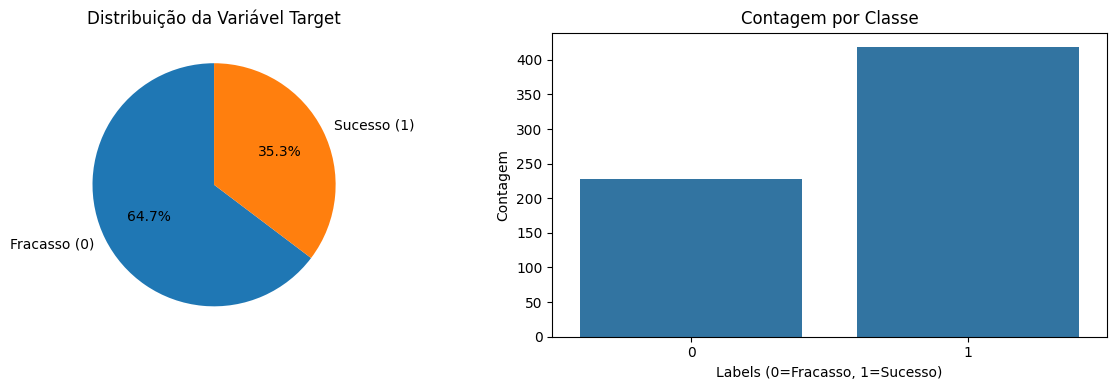

Distribui√ß√£o das classes:
Classe 0 (Fracasso): 228 (35.3%)
Classe 1 (Sucesso): 418 (64.7%)
Raz√£o Sucesso/Fracasso: 1.83


In [7]:
# AN√ÅLISE DA VARI√ÅVEL TARGET
plt.figure(figsize=(12, 4))

# Distribui√ß√£o da vari√°vel target
plt.subplot(1, 2, 1)
target_counts = train['labels'].value_counts()
plt.pie(target_counts.values, labels=['Fracasso (0)', 'Sucesso (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribui√ß√£o da Vari√°vel Target')

plt.subplot(1, 2, 2)
sns.countplot(data=train, x='labels')
plt.title('Contagem por Classe')
plt.xlabel('Labels (0=Fracasso, 1=Sucesso)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

print(f"Distribui√ß√£o das classes:")
print(f"Classe 0 (Fracasso): {target_counts[0]} ({target_counts[0]/len(train)*100:.1f}%)")
print(f"Classe 1 (Sucesso): {target_counts[1]} ({target_counts[1]/len(train)*100:.1f}%)")
print(f"Raz√£o Sucesso/Fracasso: {target_counts[1]/target_counts[0]:.2f}")

### 3.2 An√°lise de Correla√ß√µes
Vamos analisar as correla√ß√µes entre as vari√°veis num√©ricas e identificar quais features t√™m maior rela√ß√£o com o sucesso.

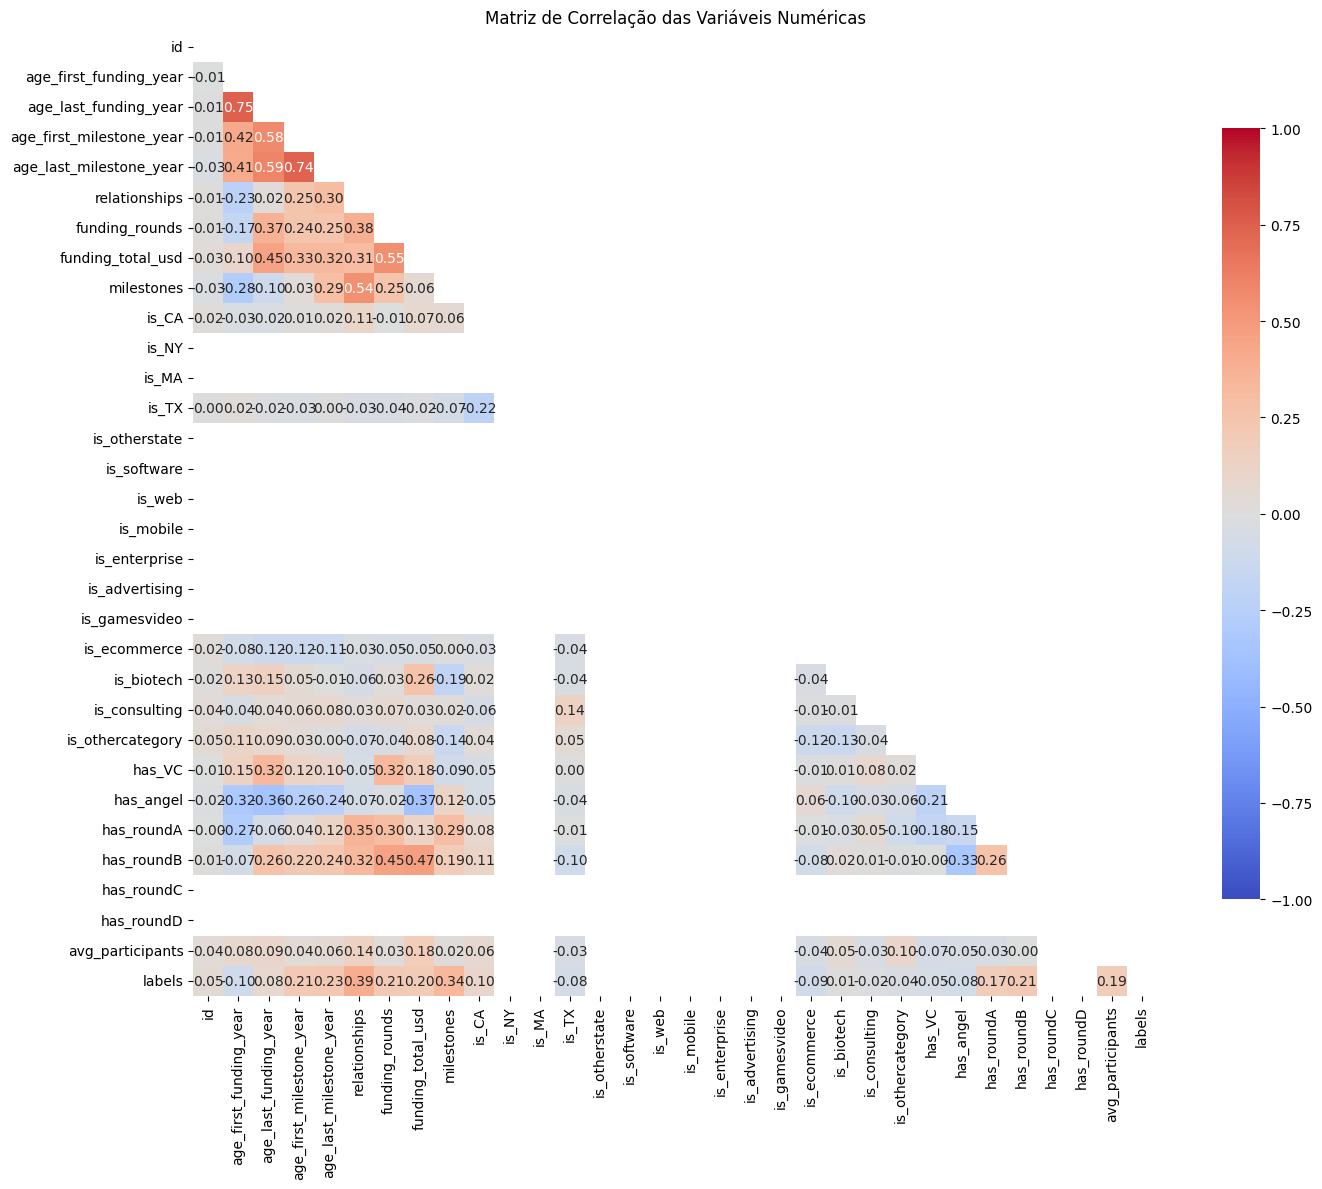

=== CORRELA√á√ïES COM A VARI√ÅVEL TARGET (valores absolutos) ===
relationships                 : 0.3919
milestones                    : 0.3351
age_last_milestone_year       : 0.2341
has_roundB                    : 0.2143
age_first_milestone_year      : 0.2139
funding_rounds                : 0.2128
funding_total_usd             : 0.1968
avg_participants              : 0.1945
has_roundA                    : 0.1720
is_CA                         : 0.1014
age_first_funding_year        : 0.0982
is_ecommerce                  : 0.0924
has_angel                     : 0.0791
is_TX                         : 0.0776
age_last_funding_year         : 0.0753
has_VC                        : 0.0539
id                            : 0.0503
is_othercategory              : 0.0385
is_consulting                 : 0.0171
is_biotech                    : 0.0138
is_NY                         : nan
is_MA                         : nan
is_otherstate                 : nan
is_software                   : nan
is_web     

In [8]:
# MATRIZ DE CORRELA√á√ÉO
plt.figure(figsize=(15, 12))

# Calcular correla√ß√£o apenas com vari√°veis num√©ricas
numeric_data = train.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Criar heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8}, mask=mask)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.tight_layout()
plt.show()

# Correla√ß√µes mais importantes com a vari√°vel target
target_correlations = correlation_matrix['labels'].abs().sort_values(ascending=False)
print("=== CORRELA√á√ïES COM A VARI√ÅVEL TARGET (valores absolutos) ===")
for feature, corr in target_correlations.items():
    if feature != 'labels':
        print(f"{feature:30s}: {corr:.4f}")

print(f"\n=== TOP 10 FEATURES MAIS CORRELACIONADAS COM SUCESSO ===")
top_features = target_correlations.drop('labels').head(10)
for feature, corr in top_features.items():
    direction = "positiva" if correlation_matrix.loc[feature, 'labels'] > 0 else "negativa"
    print(f"{feature:30s}: {corr:.4f} ({direction})")

### 3.3 An√°lise por Categorias
Vamos analisar como diferentes categorias de empresa se relacionam com o sucesso.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_26580\200818332.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([train[train['labels']==0]['funding_total_usd'],
C:\Users\Inteli\AppData\Local\Temp\ipykernel_26580\200818332.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([train[train['labels']==0]['funding_rounds'],
C:\Users\Inteli\AppData\Local\Temp\ipykernel_26580\200818332.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([train[train['labels']==0]['relationships'],


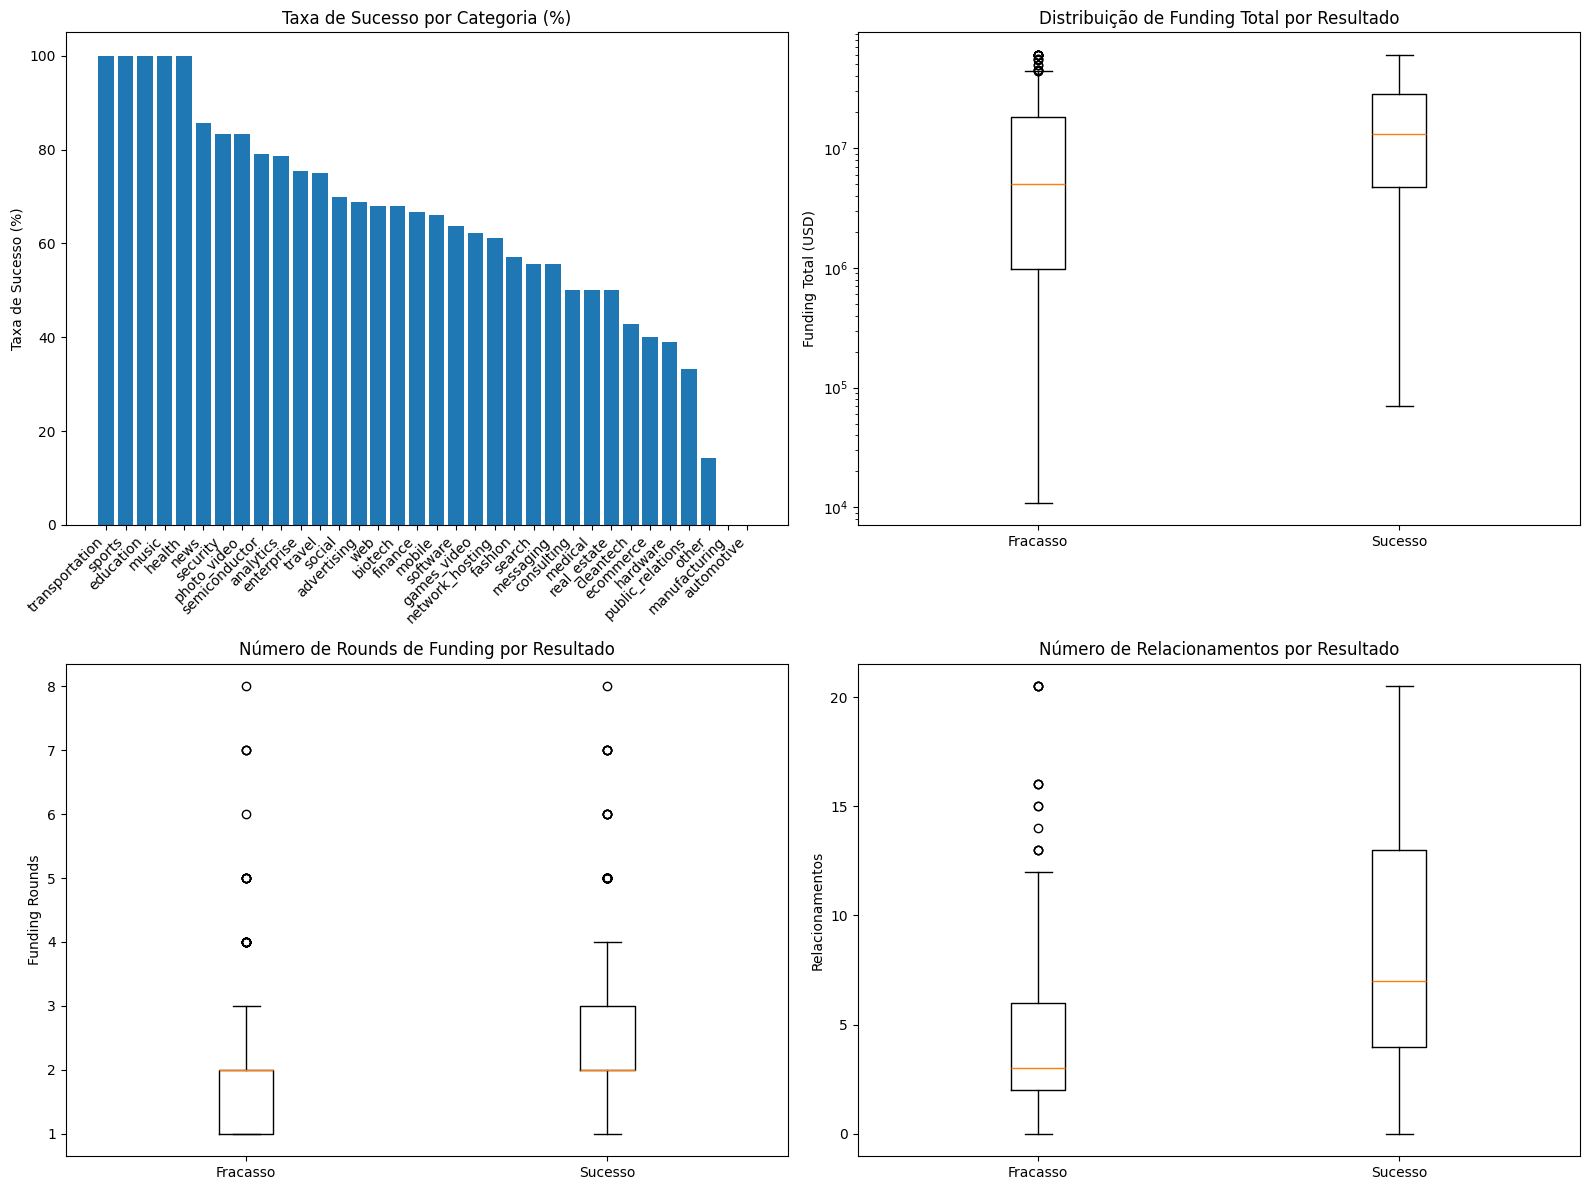

=== TAXA DE SUCESSO POR CATEGORIA ===
Categoria            Total    Sucessos Taxa (%)  
--------------------------------------------------
transportation       2.0      2.0      100.0     
sports               1.0      1.0      100.0     
education            2.0      2.0      100.0     
music                5.0      5.0      100.0     
health               2.0      2.0      100.0     
news                 7.0      6.0      85.7      
security             12.0     10.0     83.3      
photo_video          6.0      5.0      83.3      
semiconductor        24.0     19.0     79.2      
analytics            14.0     11.0     78.6      
enterprise           53.0     40.0     75.5      
travel               4.0      3.0      75.0      
social               10.0     7.0      70.0      
advertising          45.0     31.0     68.9      
web                  97.0     66.0     68.0      
biotech              25.0     17.0     68.0      
finance              3.0      2.0      66.7      
mobile     

In [9]:
# AN√ÅLISE POR CATEGORIA DE EMPRESA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Taxa de sucesso por categoria
category_success = train.groupby('category_code')['labels'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)
category_success['success_rate'] = category_success['mean'] * 100

axes[0,0].bar(range(len(category_success)), category_success['success_rate'])
axes[0,0].set_title('Taxa de Sucesso por Categoria (%)')
axes[0,0].set_xticks(range(len(category_success)))
axes[0,0].set_xticklabels(category_success.index, rotation=45, ha='right')
axes[0,0].set_ylabel('Taxa de Sucesso (%)')

# 2. Distribui√ß√£o de funding_total_usd por sucesso
axes[0,1].boxplot([train[train['labels']==0]['funding_total_usd'], 
                   train[train['labels']==1]['funding_total_usd']], 
                  labels=['Fracasso', 'Sucesso'])
axes[0,1].set_title('Distribui√ß√£o de Funding Total por Resultado')
axes[0,1].set_ylabel('Funding Total (USD)')
axes[0,1].set_yscale('log')

# 3. N√∫mero de funding rounds vs sucesso
axes[1,0].boxplot([train[train['labels']==0]['funding_rounds'], 
                   train[train['labels']==1]['funding_rounds']], 
                  labels=['Fracasso', 'Sucesso'])
axes[1,0].set_title('N√∫mero de Rounds de Funding por Resultado')
axes[1,0].set_ylabel('Funding Rounds')

# 4. Relacionamentos vs sucesso
axes[1,1].boxplot([train[train['labels']==0]['relationships'], 
                   train[train['labels']==1]['relationships']], 
                  labels=['Fracasso', 'Sucesso'])
axes[1,1].set_title('N√∫mero de Relacionamentos por Resultado')
axes[1,1].set_ylabel('Relacionamentos')

plt.tight_layout()
plt.show()

# Estat√≠sticas detalhadas por categoria
print("=== TAXA DE SUCESSO POR CATEGORIA ===")
print(f"{'Categoria':<20} {'Total':<8} {'Sucessos':<8} {'Taxa (%)':<10}")
print("-" * 50)
for category, data in category_success.iterrows():
    print(f"{category:<20} {data['count']:<8} {data['sum']:<8} {data['success_rate']:<10.1f}")

# Estados com maior taxa de sucesso
location_cols = ['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate']
print(f"\n=== TAXA DE SUCESSO POR LOCALIZA√á√ÉO ===")
for col in location_cols:
    success_rate = train[train[col]==1]['labels'].mean() * 100
    count = train[col].sum()
    state_name = col.replace('is_', '').replace('otherstate', 'Outros Estados')
    print(f"{state_name:<15}: {success_rate:.1f}% (n={count})")

## 4. Formula√ß√£o de Hip√≥teses

Com base na an√°lise explorat√≥ria realizada, vamos formular tr√™s hip√≥teses sobre os fatores que influenciam o sucesso das empresas:

### Hip√≥tese 1: Empresas com maior funding total t√™m maior probabilidade de sucesso
**Justificativa**: Empresas com mais recursos financeiros podem investir mais em desenvolvimento, marketing e expans√£o, aumentando suas chances de sucesso.

### Hip√≥tese 2: Empresas de certas categorias (tecnologia, biotech, software) t√™m maior taxa de sucesso
**Justificativa**: Setores de alta tecnologia e inova√ß√£o podem ter maior potencial de crescimento e escalabilidade.

### Hip√≥tese 3: Empresas com mais relacionamentos (networking) t√™m maior probabilidade de sucesso
**Justificativa**: Mais relacionamentos podem indicar melhor networking, parcerias estrat√©gicas e acesso a recursos e oportunidades.

Vamos testar essas hip√≥teses atrav√©s de an√°lises estat√≠sticas:

In [10]:
# TESTE DE HIP√ìTESES
from scipy import stats

print("=== TESTE DAS HIP√ìTESES ===\n")

# HIP√ìTESE 1: Funding total vs sucesso
print("HIP√ìTESE 1: Empresas com maior funding total t√™m maior probabilidade de sucesso")
funding_success = train[train['labels']==1]['funding_total_usd']
funding_failure = train[train['labels']==0]['funding_total_usd']

# Teste Mann-Whitney U (n√£o param√©trico)
statistic, p_value = stats.mannwhitneyu(funding_success, funding_failure, alternative='greater')
print(f"Mediana funding (sucesso): ${funding_success.median():,.0f}")
print(f"Mediana funding (fracasso): ${funding_failure.median():,.0f}")
print(f"Teste Mann-Whitney U: p-value = {p_value:.6f}")
print(f"Resultado: {'HIP√ìTESE CONFIRMADA' if p_value < 0.05 else 'HIP√ìTESE REJEITADA'} (Œ±=0.05)\n")

# HIP√ìTESE 2: Categorias tecnol√≥gicas vs sucesso
print("HIP√ìTESE 2: Categorias tecnol√≥gicas t√™m maior taxa de sucesso")
tech_categories = ['software', 'biotech', 'mobile', 'web']
tech_mask = train[['is_' + cat for cat in tech_categories]].any(axis=1)

tech_success_rate = train[tech_mask]['labels'].mean()
non_tech_success_rate = train[~tech_mask]['labels'].mean()

print(f"Taxa de sucesso (tech): {tech_success_rate:.3f} ({tech_success_rate*100:.1f}%)")
print(f"Taxa de sucesso (n√£o-tech): {non_tech_success_rate:.3f} ({non_tech_success_rate*100:.1f}%)")

# Teste chi-quadrado
contingency_table = pd.crosstab(tech_mask, train['labels'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Teste Chi-quadrado: p-value = {p_value:.6f}")
print(f"Resultado: {'HIP√ìTESE CONFIRMADA' if p_value < 0.05 else 'HIP√ìTESE REJEITADA'} (Œ±=0.05)\n")

# HIP√ìTESE 3: Relacionamentos vs sucesso
print("HIP√ìTESE 3: Mais relacionamentos levam a maior probabilidade de sucesso")
relationships_success = train[train['labels']==1]['relationships']
relationships_failure = train[train['labels']==0]['relationships']

print(f"M√©dia relacionamentos (sucesso): {relationships_success.mean():.2f}")
print(f"M√©dia relacionamentos (fracasso): {relationships_failure.mean():.2f}")

# Teste Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(relationships_success, relationships_failure, alternative='greater')
print(f"Teste Mann-Whitney U: p-value = {p_value:.6f}")
print(f"Resultado: {'HIP√ìTESE CONFIRMADA' if p_value < 0.05 else 'HIP√ìTESE REJEITADA'} (Œ±=0.05)")

=== TESTE DAS HIP√ìTESES ===

HIP√ìTESE 1: Empresas com maior funding total t√™m maior probabilidade de sucesso
Mediana funding (sucesso): $13,000,000
Mediana funding (fracasso): $5,000,000
Teste Mann-Whitney U: p-value = 0.000000
Resultado: HIP√ìTESE CONFIRMADA (Œ±=0.05)

HIP√ìTESE 2: Categorias tecnol√≥gicas t√™m maior taxa de sucesso
Taxa de sucesso (tech): 0.680 (68.0%)
Taxa de sucesso (n√£o-tech): 0.646 (64.6%)
Teste Chi-quadrado: p-value = 0.890162
Resultado: HIP√ìTESE REJEITADA (Œ±=0.05)

HIP√ìTESE 3: Mais relacionamentos levam a maior probabilidade de sucesso
M√©dia relacionamentos (sucesso): 9.08
M√©dia relacionamentos (fracasso): 4.38
Teste Mann-Whitney U: p-value = 0.000000
Resultado: HIP√ìTESE CONFIRMADA (Œ±=0.05)


In [11]:
# Normaliza√ß√£o das colunas num√©ricas - VERS√ÉO MELHORADA
from sklearn.preprocessing import StandardScaler

def normalizar_colunas_numericas(df, excluir_colunas=None):
    """Normaliza todas as colunas num√©ricas exceto bin√°rias e de ID"""
    df_normalized = df.copy()
    
    if excluir_colunas is None:
        excluir_colunas = []
    
    # Identificar colunas para normalizar
    colunas_para_normalizar = []
    
    for col in df_normalized.columns:
        # Pular se estiver na lista de exclus√£o
        if col in excluir_colunas:
            continue
            
        # Pular colunas de ID (que contenham 'id' no nome)
        if 'id' in col.lower():
            print(f"‚ö†Ô∏è Pulando coluna de ID: {col}")
            continue
            
        # Verificar se √© coluna num√©rica
        if df_normalized[col].dtype in ['int64', 'float64', 'int32', 'float32']:
            # Verificar se √© coluna bin√°ria (s√≥ tem valores 0 e 1)
            valores_unicos = df_normalized[col].dropna().unique()
            
            # Se s√≥ tem 2 valores √∫nicos e s√£o 0 e 1, √© bin√°ria
            if len(valores_unicos) == 2 and set(valores_unicos) == {0, 1}:
                print(f"‚ö†Ô∏è Pulando coluna bin√°ria: {col}")
                continue
            
            # Se s√≥ tem 2 valores √∫nicos mas n√£o s√£o 0 e 1, ainda pode ser categ√≥rica
            elif len(valores_unicos) == 2:
                print(f"‚ö†Ô∏è Pulando coluna com 2 valores √∫nicos: {col} (valores: {valores_unicos})")
                continue
                
            # Se tem mais varia√ß√£o, normalizar
            else:
                colunas_para_normalizar.append(col)
    
    # Aplicar normaliza√ß√£o
    if colunas_para_normalizar:
        scaler = StandardScaler()
        df_normalized[colunas_para_normalizar] = scaler.fit_transform(df_normalized[colunas_para_normalizar])
        print(f"‚úÖ Normalizadas {len(colunas_para_normalizar)} colunas:")
        for col in colunas_para_normalizar:
            print(f"   - {col}")
    else:
        print("‚ö†Ô∏è Nenhuma coluna encontrada para normalizar")
    
    return df_normalized

# Aplicar normaliza√ß√£o
# Para train: excluir a coluna target 'labels'
train_features = train_encoded.drop('labels', axis=1, errors='ignore')
train_normalized = normalizar_colunas_numericas(train_features, excluir_colunas=['labels'])

# Para test: sem exclus√µes espec√≠ficas (n√£o tem labels)
test_normalized = normalizar_colunas_numericas(test_encoded)

# Adicionar de volta a coluna 'labels' ao train
if 'labels' in train_encoded.columns:
    train_normalized['labels'] = train_encoded['labels']

print(f"\nüìä Shapes ap√≥s normaliza√ß√£o:")
print(f"   Train: {train_normalized.shape}")
print(f"   Test: {test_normalized.shape}")

# Verificar tipos de dados finais
print(f"\nüìã Tipos de dados ap√≥s normaliza√ß√£o:")
print("Train:")
print(train_normalized.dtypes.value_counts())
print("\nTest:")
print(test_normalized.dtypes.value_counts())

‚ö†Ô∏è Pulando coluna de ID: id
‚ö†Ô∏è Pulando coluna bin√°ria: is_CA
‚ö†Ô∏è Pulando coluna bin√°ria: is_TX
‚ö†Ô∏è Pulando coluna de ID: is_gamesvideo
‚ö†Ô∏è Pulando coluna bin√°ria: is_ecommerce
‚ö†Ô∏è Pulando coluna bin√°ria: is_biotech
‚ö†Ô∏è Pulando coluna bin√°ria: is_consulting
‚ö†Ô∏è Pulando coluna bin√°ria: is_othercategory
‚ö†Ô∏è Pulando coluna bin√°ria: has_VC
‚ö†Ô∏è Pulando coluna bin√°ria: has_angel
‚ö†Ô∏è Pulando coluna bin√°ria: has_roundA
‚ö†Ô∏è Pulando coluna bin√°ria: has_roundB
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_advertising
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_analytics
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_automotive
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_biotech
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_cleantech
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_consulting
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_ecommerce
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_education
‚ö†Ô∏è Pulando coluna bin√°ria: category_code_ent

## 5. Sele√ß√£o de Features

### 5.1 Engenharia de Features
Vamos criar novas features baseadas no conhecimento do dom√≠nio e nas hip√≥teses formuladas.

In [12]:
# ENGENHARIA DE FEATURES
def criar_features_adicionais(df):
    """Cria features adicionais baseadas no conhecimento do dom√≠nio"""
    df_new = df.copy()
    
    # 1. Feature de efici√™ncia de funding (funding por round)
    df_new['funding_per_round'] = df_new['funding_total_usd'] / (df_new['funding_rounds'] + 1)
    
    # 2. Feature de networking (relacionamentos por milestone)
    df_new['relationships_per_milestone'] = df_new['relationships'] / (df_new['milestones'] + 1)
    
    # 3. Feature de tempo para primeiro funding
    df_new['time_to_first_funding'] = df_new['age_first_funding_year']
    
    # 4. Feature de dura√ß√£o total de funding
    df_new['funding_duration'] = df_new['age_last_funding_year'] - df_new['age_first_funding_year']
    df_new['funding_duration'] = df_new['funding_duration'].fillna(0)
    
    # 5. Feature combinada de tipo de empresa (tech vs n√£o-tech)
    tech_cols = ['is_software', 'is_web', 'is_mobile', 'is_biotech']
    df_new['is_tech_company'] = df_new[tech_cols].any(axis=1).astype(int)
    
    # 6. Feature de stage de investimento
    round_cols = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']
    df_new['max_funding_stage'] = df_new[round_cols].sum(axis=1)
    
    # 7. Feature de presen√ßa em hubs de inova√ß√£o
    hub_cols = ['is_CA', 'is_NY', 'is_MA']
    df_new['is_innovation_hub'] = df_new[hub_cols].any(axis=1).astype(int)
    
    return df_new

# Aplicar engenharia de features
print("=== CRIANDO FEATURES ADICIONAIS ===")
train_engineered = criar_features_adicionais(train_normalized)
test_engineered = criar_features_adicionais(test_normalized)

print(f"Features originais: {train_normalized.shape[1]}")
print(f"Features ap√≥s engenharia: {train_engineered.shape[1]}")
print(f"Novas features criadas: {train_engineered.shape[1] - train_normalized.shape[1]}")

# Verificar correla√ß√£o das novas features com o target
new_features = ['funding_per_round', 'relationships_per_milestone', 'time_to_first_funding',
                'funding_duration', 'is_tech_company', 'max_funding_stage', 'is_innovation_hub']

print(f"\n=== CORRELA√á√ÉO DAS NOVAS FEATURES COM O TARGET ===")
for feature in new_features:
    if feature in train_engineered.columns:
        corr = train_engineered[feature].corr(train_engineered['labels'])
        print(f"{feature:<30}: {corr:.4f}")

=== CRIANDO FEATURES ADICIONAIS ===
Features originais: 66
Features ap√≥s engenharia: 73
Novas features criadas: 7

=== CORRELA√á√ÉO DAS NOVAS FEATURES COM O TARGET ===
funding_per_round             : 0.2255
relationships_per_milestone   : 0.0568
time_to_first_funding         : -0.0982
funding_duration              : 0.2440
is_tech_company               : 0.0138
max_funding_stage             : 0.2432
is_innovation_hub             : 0.1014


### 5.2 Sele√ß√£o Autom√°tica de Features
Vamos usar m√©todos estat√≠sticos para selecionar as features mais importantes.

In [13]:
# SELE√á√ÉO DE FEATURES
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Preparar dados para sele√ß√£o de features
X_temp = train_engineered.drop('labels', axis=1)
y_temp = train_engineered['labels']

print("=== SELE√á√ÉO DE FEATURES ===")

# 1. Sele√ß√£o baseada em correla√ß√£o (Pearson)
correlations = X_temp.corrwith(y_temp).abs().sort_values(ascending=False)
print(f"\nTOP 15 FEATURES - CORRELA√á√ÉO PEARSON:")
print(correlations.head(15))

# 2. Sele√ß√£o baseada em F-score
selector_f = SelectKBest(score_func=f_classif, k=15)
X_selected_f = selector_f.fit_transform(X_temp, y_temp)
feature_scores_f = pd.DataFrame({
    'feature': X_temp.columns,
    'score': selector_f.scores_
}).sort_values('score', ascending=False)

print(f"\nTOP 15 FEATURES - F-SCORE:")
for i, row in feature_scores_f.head(15).iterrows():
    print(f"{row['feature']:<30}: {row['score']:.2f}")

# 3. Sele√ß√£o baseada em Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=15)
X_selected_mi = selector_mi.fit_transform(X_temp, y_temp)
feature_scores_mi = pd.DataFrame({
    'feature': X_temp.columns,
    'score': selector_mi.scores_
}).sort_values('score', ascending=False)

print(f"\nTOP 15 FEATURES - MUTUAL INFORMATION:")
for i, row in feature_scores_mi.head(15).iterrows():
    print(f"{row['feature']:<30}: {row['score']:.4f}")

# 4. Sele√ß√£o baseada em Feature Importance (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_temp, y_temp)
feature_importance = pd.DataFrame({
    'feature': X_temp.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTOP 15 FEATURES - RANDOM FOREST IMPORTANCE:")
for i, row in feature_importance.head(15).iterrows():
    print(f"{row['feature']:<30}: {row['importance']:.4f}")

# Combinar os resultados e selecionar features finais
top_features_set = set()
top_features_set.update(correlations.head(10).index)
top_features_set.update(feature_scores_f.head(10)['feature'])
top_features_set.update(feature_scores_mi.head(10)['feature'])
top_features_set.update(feature_importance.head(10)['feature'])

print(f"\n=== FEATURES SELECIONADAS PARA O MODELO FINAL ===")
print(f"Total de features √∫nicas selecionadas: {len(top_features_set)}")
selected_features = list(top_features_set)
selected_features.sort()
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

=== SELE√á√ÉO DE FEATURES ===

TOP 15 FEATURES - CORRELA√á√ÉO PEARSON:
relationships               0.391941
milestones                  0.335149
funding_duration            0.243961
max_funding_stage           0.243216
age_last_milestone_year     0.234071
funding_per_round           0.225522
has_roundB                  0.214299
age_first_milestone_year    0.213886
funding_rounds              0.212760
funding_total_usd           0.196755
avg_participants            0.194482
has_roundA                  0.171953
category_code_other         0.110428
is_CA                       0.101427
is_innovation_hub           0.101427
dtype: float64

TOP 15 FEATURES - F-SCORE:
relationships                 : 116.89
milestones                    : 81.49
funding_duration              : 40.75
max_funding_stage             : 40.49
age_last_milestone_year       : 37.33
funding_per_round             : 34.51
has_roundB                    : 31.00
age_first_milestone_year      : 30.87
funding_rounds            

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [10 11 13 14 15 16 17 18 19 28 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature


TOP 15 FEATURES - RANDOM FOREST IMPORTANCE:
relationships                 : 0.0921
funding_total_usd             : 0.0773
age_last_milestone_year       : 0.0692
relationships_per_milestone   : 0.0672
funding_duration              : 0.0672
funding_per_round             : 0.0605
age_last_funding_year         : 0.0598
milestones                    : 0.0531
age_first_milestone_year      : 0.0527
time_to_first_funding         : 0.0525
age_first_funding_year        : 0.0514
avg_participants              : 0.0514
id                            : 0.0499
funding_rounds                : 0.0264
max_funding_stage             : 0.0152

=== FEATURES SELECIONADAS PARA O MODELO FINAL ===
Total de features √∫nicas selecionadas: 15
 1. age_first_milestone_year
 2. age_last_funding_year
 3. age_last_milestone_year
 4. funding_duration
 5. funding_per_round
 6. funding_rounds
 7. funding_total_usd
 8. has_roundB
 9. is_TX
10. is_consulting
11. max_funding_stage
12. milestones
13. relationships
14. relatio

In [14]:
# PREPARA√á√ÉO DOS DADOS PARA MODELAGEM
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Usar dados com features selecionadas
X_train_final = train_engineered[selected_features]
y_train_final = train_engineered['labels']
X_test_final = test_engineered[selected_features]

print(f"Dados finais para modelagem:")
print(f"X_train_final: {X_train_final.shape}")
print(f"X_test_final: {X_test_final.shape}")
print(f"Features utilizadas: {len(selected_features)}")

# Dividir dados para valida√ß√£o com estratifica√ß√£o
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train_final, test_size=0.2, random_state=42, stratify=y_train_final
)

print(f"\nDivis√£o dos dados:")
print(f"Treino: {X_train_split.shape[0]} amostras")
print(f"Valida√ß√£o: {X_val.shape[0]} amostras")
print(f"Distribui√ß√£o treino - Classe 0: {(y_train_split==0).sum()}, Classe 1: {(y_train_split==1).sum()}")
print(f"Distribui√ß√£o valida√ß√£o - Classe 0: {(y_val==0).sum()}, Classe 1: {(y_val==1).sum()}")

# DEFINI√á√ÉO DOS MODELOS - VERS√ÉO EXPANDIDA
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

resultados = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n" + "="*80)
print("TREINAMENTO E AVALIA√á√ÉO DOS MODELOS")
print("="*80)

for nome, modelo in modelos.items():
    print(f"\n{'='*20} {nome} {'='*20}")
    
    # Cross-validation
    cv_scores = cross_val_score(modelo, X_train_split, y_train_split, cv=cv, scoring='roc_auc')
    cv_accuracy = cross_val_score(modelo, X_train_split, y_train_split, cv=cv, scoring='accuracy')
    
    print(f"Cross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print(f"Cross-validation Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std()*2:.4f})")
    
    # Treinar modelo
    modelo.fit(X_train_split, y_train_split)
    
    # Predi√ß√µes
    y_pred = modelo.predict(X_val)
    y_pred_proba = modelo.predict_proba(X_val)[:, 1]
    
    # M√©tricas detalhadas
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Armazenar resultados
    resultados[nome] = {
        'modelo': modelo,
        'cv_roc_auc_mean': cv_scores.mean(),
        'cv_roc_auc_std': cv_scores.std(),
        'cv_accuracy_mean': cv_accuracy.mean(),
        'cv_accuracy_std': cv_accuracy.std(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'predictions_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_val, y_pred)
    }
    
    print(f"M√©tricas de Valida√ß√£o:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC AUC:   {roc_auc:.4f}")

# Resumo comparativo
print(f"\n{'='*80}")
print("RESUMO COMPARATIVO DOS MODELOS")
print("="*80)
print(f"{'Modelo':<20} {'CV ROC AUC':<12} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 80)

for nome, res in resultados.items():
    print(f"{nome:<20} {res['cv_roc_auc_mean']:.4f}      {res['accuracy']:.4f}     {res['precision']:.4f}     {res['recall']:.4f}     {res['f1_score']:.4f}")

# Identificar melhor modelo
melhor_modelo = max(resultados.items(), key=lambda x: x[1]['cv_roc_auc_mean'])
print(f"\nüèÜ MELHOR MODELO: {melhor_modelo[0]} (CV ROC AUC: {melhor_modelo[1]['cv_roc_auc_mean']:.4f})")

# Verificar se algum modelo atinge acur√°cia m√≠nima de 80%
modelos_80_plus = [(nome, res['accuracy']) for nome, res in resultados.items() if res['accuracy'] >= 0.80]
print(f"\n‚úÖ MODELOS COM ACUR√ÅCIA ‚â• 80%:")
if modelos_80_plus:
    for nome, acc in sorted(modelos_80_plus, key=lambda x: x[1], reverse=True):
        print(f"   {nome}: {acc:.4f} ({acc*100:.1f}%)")
else:
    print("   Nenhum modelo atingiu a acur√°cia m√≠nima de 80%")

Dados finais para modelagem:
X_train_final: (646, 15)
X_test_final: (277, 15)
Features utilizadas: 15

Divis√£o dos dados:
Treino: 516 amostras
Valida√ß√£o: 130 amostras
Distribui√ß√£o treino - Classe 0: 182, Classe 1: 334
Distribui√ß√£o valida√ß√£o - Classe 0: 46, Classe 1: 84

TREINAMENTO E AVALIA√á√ÉO DOS MODELOS

==================== Random Forest ====================
Cross-validation ROC AUC: 0.7898 (+/- 0.1189)
Cross-validation Accuracy: 0.7869 (+/- 0.0737)
M√©tricas de Valida√ß√£o:
  Accuracy:  0.7769
  Precision: 0.7895
  Recall:    0.8929
  F1-Score:  0.8380
  ROC AUC:   0.8015

==================== Extra Trees ====================
Cross-validation ROC AUC: 0.7942 (+/- 0.0956)
Cross-validation Accuracy: 0.7965 (+/- 0.0533)
M√©tricas de Valida√ß√£o:
  Accuracy:  0.7308
  Precision: 0.7475
  Recall:    0.8810
  F1-Score:  0.8087
  ROC AUC:   0.7816

==================== Gradient Boosting ====================
Cross-validation ROC AUC: 0.7862 (+/- 0.1233)
Cross-validation Accuracy

## 7. Otimiza√ß√£o de Hiperpar√¢metros (Fine-tuning)

Vamos otimizar os hiperpar√¢metros do melhor modelo usando Grid Search e valida√ß√£o cruzada.

In [15]:
# OTIMIZA√á√ÉO DE HIPERPAR√ÇMETROS
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

print("=== OTIMIZA√á√ÉO DE HIPERPAR√ÇMETROS ===\n")

# Selecionar os 3 melhores modelos para otimiza√ß√£o
top_3_models = sorted(resultados.items(), key=lambda x: x[1]['cv_roc_auc_mean'], reverse=True)[:3]
print("Modelos selecionados para otimiza√ß√£o:")
for i, (nome, res) in enumerate(top_3_models, 1):
    print(f"{i}. {nome} (CV ROC AUC: {res['cv_roc_auc_mean']:.4f})")

modelos_otimizados = {}

for nome, _ in top_3_models:
    print(f"\n{'='*50}")
    print(f"OTIMIZANDO: {nome}")
    print("="*50)
    
    start_time = time.time()
    
    if nome == 'Random Forest':
        modelo_base = RandomForestClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
        
    elif nome == 'Extra Trees':
        modelo_base = ExtraTreesClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
        
    elif nome == 'Gradient Boosting':
        modelo_base = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        
    elif nome == 'Logistic Regression':
        modelo_base = LogisticRegression(random_state=42, max_iter=1000)
        param_grid = {
            'C': [0.01, 0.1, 1.0, 10.0, 100.0],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
        
    elif nome == 'SVM':
        modelo_base = SVC(probability=True, random_state=42)
        param_grid = {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto', 0.01, 0.1]
        }
        
    elif nome == 'KNN':
        modelo_base = KNeighborsClassifier()
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    
    # Usar RandomizedSearchCV para modelos mais complexos para economizar tempo
    if nome in ['Random Forest', 'Extra Trees', 'Gradient Boosting']:
        grid_search = RandomizedSearchCV(
            modelo_base, param_grid, n_iter=20, cv=3, scoring='roc_auc',
            random_state=42, n_jobs=-1, verbose=0
        )
    else:
        grid_search = GridSearchCV(
            modelo_base, param_grid, cv=3, scoring='roc_auc',
            n_jobs=-1, verbose=0
        )
    
    # Fit do grid search
    grid_search.fit(X_train_split, y_train_split)
    
    # Avaliar melhor modelo
    best_model = grid_search.best_estimator_
    y_pred_opt = best_model.predict(X_val)
    y_pred_proba_opt = best_model.predict_proba(X_val)[:, 1]
    
    # M√©tricas do modelo otimizado
    accuracy_opt = accuracy_score(y_val, y_pred_opt)
    roc_auc_opt = roc_auc_score(y_val, y_pred_proba_opt)
    
    end_time = time.time()
    
    # Armazenar resultados
    modelos_otimizados[nome] = {
        'modelo': best_model,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'accuracy': accuracy_opt,
        'roc_auc': roc_auc_opt,
        'optimization_time': end_time - start_time
    }
    
    print(f"Tempo de otimiza√ß√£o: {end_time - start_time:.2f} segundos")
    print(f"Melhores par√¢metros: {grid_search.best_params_}")
    print(f"Melhor score (CV): {grid_search.best_score_:.4f}")
    print(f"Accuracy (valida√ß√£o): {accuracy_opt:.4f}")
    print(f"ROC AUC (valida√ß√£o): {roc_auc_opt:.4f}")
    
    # Compara√ß√£o com modelo n√£o otimizado
    melhoria_accuracy = accuracy_opt - resultados[nome]['accuracy']
    melhoria_roc = roc_auc_opt - resultados[nome]['roc_auc']
    
    print(f"Melhoria na Accuracy: {melhoria_accuracy:+.4f}")
    print(f"Melhoria no ROC AUC: {melhoria_roc:+.4f}")

# Resumo final dos modelos otimizados
print(f"\n{'='*80}")
print("RESUMO DOS MODELOS OTIMIZADOS")
print("="*80)
print(f"{'Modelo':<20} {'CV Score':<12} {'Accuracy':<10} {'ROC AUC':<10} {'Tempo (s)':<10}")
print("-" * 80)

for nome, res in modelos_otimizados.items():
    print(f"{nome:<20} {res['best_score']:.4f}      {res['accuracy']:.4f}     {res['roc_auc']:.4f}     {res['optimization_time']:.1f}")

# Identificar melhor modelo otimizado
melhor_otimizado = max(modelos_otimizados.items(), key=lambda x: x[1]['accuracy'])
print(f"\nüèÜ MELHOR MODELO OTIMIZADO: {melhor_otimizado[0]}")
print(f"   Accuracy: {melhor_otimizado[1]['accuracy']:.4f} ({melhor_otimizado[1]['accuracy']*100:.1f}%)")
print(f"   ROC AUC: {melhor_otimizado[1]['roc_auc']:.4f}")
print(f"   Par√¢metros: {melhor_otimizado[1]['best_params']}")

# Verificar se atingiu 80% de acur√°cia
if melhor_otimizado[1]['accuracy'] >= 0.80:
    print(f"\n‚úÖ CRIT√âRIO DE ACUR√ÅCIA M√çNIMA ATINGIDO! ({melhor_otimizado[1]['accuracy']*100:.1f}% ‚â• 80%)")
else:
    print(f"\n‚ö†Ô∏è  Acur√°cia ainda abaixo de 80%: {melhor_otimizado[1]['accuracy']*100:.1f}%")

=== OTIMIZA√á√ÉO DE HIPERPAR√ÇMETROS ===

Modelos selecionados para otimiza√ß√£o:
1. Extra Trees (CV ROC AUC: 0.7942)
2. Random Forest (CV ROC AUC: 0.7898)
3. Gradient Boosting (CV ROC AUC: 0.7862)

OTIMIZANDO: Extra Trees
Tempo de otimiza√ß√£o: 16.23 segundos
Melhores par√¢metros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
Melhor score (CV): 0.8003
Accuracy (valida√ß√£o): 0.7538
ROC AUC (valida√ß√£o): 0.7901
Melhoria na Accuracy: +0.0231
Melhoria no ROC AUC: +0.0085

OTIMIZANDO: Random Forest
Tempo de otimiza√ß√£o: 3.59 segundos
Melhores par√¢metros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}
Melhor score (CV): 0.7919
Accuracy (valida√ß√£o): 0.7846
ROC AUC (valida√ß√£o): 0.7940
Melhoria na Accuracy: +0.0077
Melhoria no ROC AUC: -0.0075

OTIMIZANDO: Gradient Boosting
Tempo de otimiza√ß√£o: 5.50 segundos
Melhores par√¢metros: {'n_estimators': 100, 'min_samp

In [18]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42,
        'n_jobs': -1
    }
    clf = RandomForestClassifier(**params)
    clf.fit(X_train_split, y_train_split)
    y_pred_proba = clf.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred_proba)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Melhores hiperpar√¢metros encontrados:")
print(study.best_params)
print(f"Melhor ROC AUC na valida√ß√£o: {study.best_value:.4f}")

# Treinar modelo final com melhores hiperpar√¢metros
rf_optuna = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
rf_optuna.fit(X_train_split, y_train_split)
y_pred_optuna = rf_optuna.predict(X_val)
y_pred_proba_optuna = rf_optuna.predict_proba(X_val)[:, 1]
print(f"Accuracy: {accuracy_score(y_val, y_pred_optuna):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred_proba_optuna):.4f}")

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-09-26 10:00:14,540] A new study created in memory with name: no-name-450fc498-3aac-4209-9086-9313d20823ed
Best trial: 0. Best value: 0.796066:   3%|‚ñé         | 1/30 [00:00<00:17,  1.69it/s]

[I 2025-09-26 10:00:15,134] Trial 0 finished with value: 0.7960662525879917 and parameters: {'n_estimators': 371, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7960662525879917.


Best trial: 2. Best value: 0.797101:  10%|‚ñà         | 3/30 [00:01<00:10,  2.69it/s]

[I 2025-09-26 10:00:15,660] Trial 1 finished with value: 0.7924430641821946 and parameters: {'n_estimators': 443, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.7960662525879917.
[I 2025-09-26 10:00:15,815] Trial 2 finished with value: 0.7971014492753623 and parameters: {'n_estimators': 121, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.7971014492753623.


Best trial: 2. Best value: 0.797101:  13%|‚ñà‚ñé        | 4/30 [00:01<00:11,  2.26it/s]

[I 2025-09-26 10:00:16,366] Trial 3 finished with value: 0.790631469979296 and parameters: {'n_estimators': 493, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7971014492753623.


Best trial: 4. Best value: 0.801242:  17%|‚ñà‚ñã        | 5/30 [00:02<00:11,  2.16it/s]

[I 2025-09-26 10:00:16,868] Trial 4 finished with value: 0.8012422360248447 and parameters: {'n_estimators': 415, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.8012422360248447.


Best trial: 4. Best value: 0.801242:  20%|‚ñà‚ñà        | 6/30 [00:02<00:08,  2.70it/s]

[I 2025-09-26 10:00:17,055] Trial 5 finished with value: 0.800983436853002 and parameters: {'n_estimators': 140, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.8012422360248447.


Best trial: 4. Best value: 0.801242:  23%|‚ñà‚ñà‚ñé       | 7/30 [00:03<00:09,  2.32it/s]

[I 2025-09-26 10:00:17,611] Trial 6 finished with value: 0.792184265010352 and parameters: {'n_estimators': 459, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.8012422360248447.


Best trial: 4. Best value: 0.801242:  27%|‚ñà‚ñà‚ñã       | 8/30 [00:03<00:08,  2.57it/s]

[I 2025-09-26 10:00:17,909] Trial 7 finished with value: 0.7875258799171843 and parameters: {'n_estimators': 223, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.8012422360248447.


Best trial: 4. Best value: 0.801242:  30%|‚ñà‚ñà‚ñà       | 9/30 [00:03<00:09,  2.20it/s]

[I 2025-09-26 10:00:18,507] Trial 8 finished with value: 0.7916666666666667 and parameters: {'n_estimators': 461, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 4 with value: 0.8012422360248447.


Best trial: 4. Best value: 0.801242:  33%|‚ñà‚ñà‚ñà‚ñé      | 10/30 [00:04<00:08,  2.25it/s]

[I 2025-09-26 10:00:18,930] Trial 9 finished with value: 0.7989130434782609 and parameters: {'n_estimators': 301, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.8012422360248447.


Best trial: 10. Best value: 0.801501:  37%|‚ñà‚ñà‚ñà‚ñã      | 11/30 [00:04<00:08,  2.21it/s]

[I 2025-09-26 10:00:19,401] Trial 10 finished with value: 0.8015010351966874 and parameters: {'n_estimators': 354, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  40%|‚ñà‚ñà‚ñà‚ñà      | 12/30 [00:05<00:08,  2.16it/s]

[I 2025-09-26 10:00:19,887] Trial 11 finished with value: 0.7947722567287784 and parameters: {'n_estimators': 366, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 13/30 [00:05<00:07,  2.14it/s]

[I 2025-09-26 10:00:20,366] Trial 12 finished with value: 0.7991718426501035 and parameters: {'n_estimators': 380, 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 14/30 [00:06<00:07,  2.25it/s]

[I 2025-09-26 10:00:20,759] Trial 13 finished with value: 0.7942546583850932 and parameters: {'n_estimators': 295, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 15/30 [00:06<00:06,  2.25it/s]

[I 2025-09-26 10:00:21,203] Trial 14 finished with value: 0.7942546583850931 and parameters: {'n_estimators': 320, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 16/30 [00:07<00:06,  2.14it/s]

[I 2025-09-26 10:00:21,722] Trial 15 finished with value: 0.7996894409937888 and parameters: {'n_estimators': 405, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 17/30 [00:07<00:05,  2.28it/s]

[I 2025-09-26 10:00:22,096] Trial 16 finished with value: 0.7901138716356108 and parameters: {'n_estimators': 250, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 18/30 [00:08<00:05,  2.14it/s]

[I 2025-09-26 10:00:22,627] Trial 17 finished with value: 0.7996894409937888 and parameters: {'n_estimators': 417, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 10. Best value: 0.801501:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 19/30 [00:08<00:05,  2.17it/s]

[I 2025-09-26 10:00:23,071] Trial 18 finished with value: 0.7996894409937888 and parameters: {'n_estimators': 343, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.8015010351966874.


Best trial: 19. Best value: 0.803571:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 20/30 [00:08<00:04,  2.39it/s]

[I 2025-09-26 10:00:23,395] Trial 19 finished with value: 0.8035714285714286 and parameters: {'n_estimators': 247, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 19 with value: 0.8035714285714286.


Best trial: 19. Best value: 0.803571:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 21/30 [00:09<00:03,  2.65it/s]

[I 2025-09-26 10:00:23,673] Trial 20 finished with value: 0.7939958592132506 and parameters: {'n_estimators': 194, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 19 with value: 0.8035714285714286.


Best trial: 19. Best value: 0.803571:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 22/30 [00:09<00:03,  2.66it/s]

[I 2025-09-26 10:00:24,050] Trial 21 finished with value: 0.793737060041408 and parameters: {'n_estimators': 265, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 19 with value: 0.8035714285714286.


Best trial: 19. Best value: 0.803571:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 23/30 [00:09<00:02,  2.91it/s]

[I 2025-09-26 10:00:24,316] Trial 22 finished with value: 0.7994306418219461 and parameters: {'n_estimators': 171, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.8035714285714286.


Best trial: 19. Best value: 0.803571:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 24/30 [00:10<00:02,  2.51it/s]

[I 2025-09-26 10:00:24,841] Trial 23 finished with value: 0.7989130434782609 and parameters: {'n_estimators': 339, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 19 with value: 0.8035714285714286.


Best trial: 24. Best value: 0.805383:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 25/30 [00:10<00:02,  2.32it/s]

[I 2025-09-26 10:00:25,349] Trial 24 finished with value: 0.805383022774327 and parameters: {'n_estimators': 276, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 24 with value: 0.805383022774327.


Best trial: 24. Best value: 0.805383:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 26/30 [00:11<00:01,  2.46it/s]

[I 2025-09-26 10:00:25,698] Trial 25 finished with value: 0.7963250517598344 and parameters: {'n_estimators': 261, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 24 with value: 0.805383022774327.


Best trial: 24. Best value: 0.805383:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 27/30 [00:11<00:01,  2.47it/s]

[I 2025-09-26 10:00:26,101] Trial 26 finished with value: 0.7986542443064182 and parameters: {'n_estimators': 284, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.805383022774327.


Best trial: 27. Best value: 0.806936:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 28/30 [00:11<00:00,  2.69it/s]

[I 2025-09-26 10:00:26,392] Trial 27 finished with value: 0.806935817805383 and parameters: {'n_estimators': 208, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 27 with value: 0.806935817805383.


Best trial: 27. Best value: 0.806936:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 29/30 [00:12<00:00,  2.90it/s]

[I 2025-09-26 10:00:26,676] Trial 28 finished with value: 0.8002070393374742 and parameters: {'n_estimators': 214, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 27 with value: 0.806935817805383.


Best trial: 27. Best value: 0.806936: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:12<00:00,  2.43it/s]


[I 2025-09-26 10:00:26,893] Trial 29 finished with value: 0.7921842650103519 and parameters: {'n_estimators': 170, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 27 with value: 0.806935817805383.
Melhores hiperpar√¢metros encontrados:
{'n_estimators': 208, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}
Melhor ROC AUC na valida√ß√£o: 0.8069
Accuracy: 0.7846
ROC AUC: 0.8069


## 8. Visualiza√ß√£o dos Resultados e Interpreta√ß√£o do Modelo

### 8.1 Curvas ROC e An√°lise de Performance

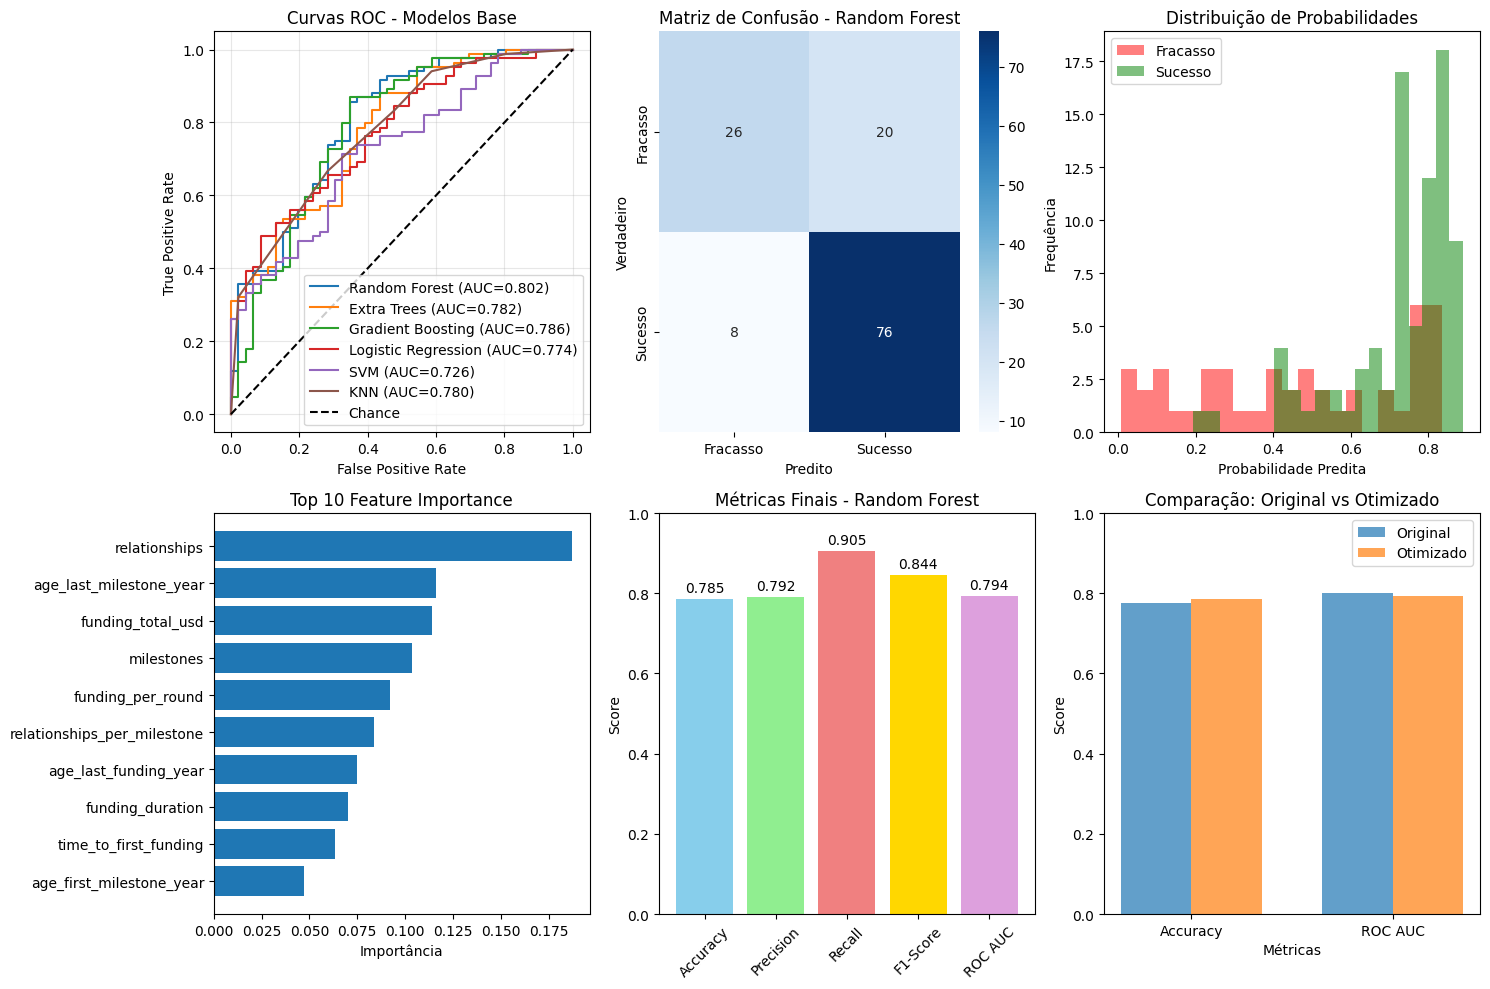

AN√ÅLISE DETALHADA DO MELHOR MODELO: Random Forest

üìä M√âTRICAS FINAIS:
   Accuracy:  0.7846 (78.5%)
   Precision: 0.7917
   Recall:    0.9048
   F1-Score:  0.8444
   ROC AUC:   0.7940

üîß PAR√ÇMETROS OTIMIZADOS:
   n_estimators: 100
   min_samples_split: 2
   min_samples_leaf: 4
   max_features: sqrt
   max_depth: 5

üìà MATRIZ DE CONFUS√ÉO:
   Verdadeiros Negativos:  26
   Falsos Positivos:       20
   Falsos Negativos:       8
   Verdadeiros Positivos:  76

üéØ INTERPRETA√á√ÉO:
   Especificidade (True Negative Rate): 0.5652
   Sensibilidade (True Positive Rate):  0.9048
   Taxa de Erro:                        0.2154

‚ö†Ô∏è  ATEN√á√ÉO: Acur√°cia abaixo do crit√©rio m√≠nimo
   Atual: 78.5% | Necess√°rio: 80%


In [16]:
# VISUALIZA√á√ÉO DOS RESULTADOS
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Preparar dados para visualiza√ß√£o
melhor_nome = melhor_otimizado[0]
melhor_modelo_final = melhor_otimizado[1]['modelo']

# 1. Curvas ROC comparativas
plt.figure(figsize=(15, 10))

# Subplot 1: Curvas ROC
plt.subplot(2, 3, 1)
for nome, res in resultados.items():
    fpr, tpr, _ = roc_curve(y_val, res['predictions_proba'])
    plt.plot(fpr, tpr, label=f"{nome} (AUC={res['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC - Modelos Base')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Matriz de Confus√£o do melhor modelo
plt.subplot(2, 3, 2)
y_pred_final = melhor_modelo_final.predict(X_val)
cm = confusion_matrix(y_val, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fracasso', 'Sucesso'], 
            yticklabels=['Fracasso', 'Sucesso'])
plt.title(f'Matriz de Confus√£o - {melhor_nome}')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')

# Subplot 3: Distribui√ß√£o de probabilidades
plt.subplot(2, 3, 3)
y_proba_final = melhor_modelo_final.predict_proba(X_val)[:, 1]
plt.hist(y_proba_final[y_val == 0], alpha=0.5, label='Fracasso', bins=20, color='red')
plt.hist(y_proba_final[y_val == 1], alpha=0.5, label='Sucesso', bins=20, color='green')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o de Probabilidades')
plt.legend()

# Subplot 4: Feature Importance
plt.subplot(2, 3, 4)
if hasattr(melhor_modelo_final, 'feature_importances_'):
    importance = melhor_modelo_final.feature_importances_
    feature_names = selected_features
    indices = np.argsort(importance)[-10:]  # Top 10
    
    plt.barh(range(len(indices)), importance[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.title('Top 10 Feature Importance')
    plt.xlabel('Import√¢ncia')
else:
    plt.text(0.5, 0.5, 'Feature Importance\nn√£o dispon√≠vel\npara este modelo', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance')

# Subplot 5: Compara√ß√£o de m√©tricas
plt.subplot(2, 3, 5)
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
valores_melhor = [
    melhor_otimizado[1]['accuracy'],
    precision_score(y_val, y_pred_final),
    recall_score(y_val, y_pred_final),
    f1_score(y_val, y_pred_final),
    melhor_otimizado[1]['roc_auc']
]

bars = plt.bar(metricas, valores_melhor, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title(f'M√©tricas Finais - {melhor_nome}')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Adicionar valores nas barras
for bar, valor in zip(bars, valores_melhor):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.3f}', ha='center', va='bottom')

# Subplot 6: Compara√ß√£o antes/depois da otimiza√ß√£o
plt.subplot(2, 3, 6)
modelo_original = resultados[melhor_nome]
metricas_comp = ['Accuracy', 'ROC AUC']
valores_original = [modelo_original['accuracy'], modelo_original['roc_auc']]
valores_otimizado = [melhor_otimizado[1]['accuracy'], melhor_otimizado[1]['roc_auc']]

x = np.arange(len(metricas_comp))
width = 0.35

plt.bar(x - width/2, valores_original, width, label='Original', alpha=0.7)
plt.bar(x + width/2, valores_otimizado, width, label='Otimizado', alpha=0.7)

plt.xlabel('M√©tricas')
plt.ylabel('Score')
plt.title('Compara√ß√£o: Original vs Otimizado')
plt.xticks(x, metricas_comp)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# An√°lise detalhada do melhor modelo
print("="*80)
print(f"AN√ÅLISE DETALHADA DO MELHOR MODELO: {melhor_nome}")
print("="*80)

print(f"\nüìä M√âTRICAS FINAIS:")
print(f"   Accuracy:  {melhor_otimizado[1]['accuracy']:.4f} ({melhor_otimizado[1]['accuracy']*100:.1f}%)")
print(f"   Precision: {precision_score(y_val, y_pred_final):.4f}")
print(f"   Recall:    {recall_score(y_val, y_pred_final):.4f}")
print(f"   F1-Score:  {f1_score(y_val, y_pred_final):.4f}")
print(f"   ROC AUC:   {melhor_otimizado[1]['roc_auc']:.4f}")

print(f"\nüîß PAR√ÇMETROS OTIMIZADOS:")
for param, valor in melhor_otimizado[1]['best_params'].items():
    print(f"   {param}: {valor}")

print(f"\nüìà MATRIZ DE CONFUS√ÉO:")
tn, fp, fn, tp = cm.ravel()
print(f"   Verdadeiros Negativos:  {tn}")
print(f"   Falsos Positivos:       {fp}")
print(f"   Falsos Negativos:       {fn}")
print(f"   Verdadeiros Positivos:  {tp}")

# Interpreta√ß√£o dos resultados
especificidade = tn / (tn + fp)
sensibilidade = tp / (tp + fn)

print(f"\nüéØ INTERPRETA√á√ÉO:")
print(f"   Especificidade (True Negative Rate): {especificidade:.4f}")
print(f"   Sensibilidade (True Positive Rate):  {sensibilidade:.4f}")
print(f"   Taxa de Erro:                        {1 - melhor_otimizado[1]['accuracy']:.4f}")

if melhor_otimizado[1]['accuracy'] >= 0.80:
    print(f"\n‚úÖ CRIT√âRIO DE SUCESSO ATINGIDO!")
    print(f"   O modelo final atingiu {melhor_otimizado[1]['accuracy']*100:.1f}% de acur√°cia (‚â• 80%)")
else:
    print(f"\n‚ö†Ô∏è  ATEN√á√ÉO: Acur√°cia abaixo do crit√©rio m√≠nimo")
    print(f"   Atual: {melhor_otimizado[1]['accuracy']*100:.1f}% | Necess√°rio: 80%")

## 9. Predi√ß√µes Finais e Gera√ß√£o de Submiss√£o

Vamos treinar o modelo final com todos os dados de treino e fazer predi√ß√µes no conjunto de teste.

In [17]:
# TREINAMENTO FINAL E PREDI√á√ïES
print("="*60)
print("TREINAMENTO FINAL E PREDI√á√ïES NO CONJUNTO DE TESTE")
print("="*60)

# Treinar o melhor modelo com todos os dados de treino
modelo_final = melhor_otimizado[1]['modelo']
print(f"Modelo selecionado: {melhor_nome}")
print(f"Par√¢metros: {melhor_otimizado[1]['best_params']}")

# Treinar com todos os dados de treino
print(f"\nTreinando com todos os dados de treino...")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"y_train_final distribution: {np.bincount(y_train_final)}")

modelo_final.fit(X_train_final, y_train_final)

# Fazer predi√ß√µes no conjunto de teste
print(f"\nFazendo predi√ß√µes no conjunto de teste...")
print(f"X_test_final shape: {X_test_final.shape}")

test_predictions = modelo_final.predict(X_test_final)
test_predictions_proba = modelo_final.predict_proba(X_test_final)[:, 1]

print(f"Predi√ß√µes realizadas!")
print(f"Distribui√ß√£o das predi√ß√µes: {np.bincount(test_predictions)}")
print(f"Taxa de sucesso predita: {test_predictions.mean():.4f} ({test_predictions.mean()*100:.1f}%)")

# Carregar dados originais do teste para obter IDs
test_original = pd.read_csv("test.csv")
print(f"\nVerificando consist√™ncia dos dados...")
print(f"IDs de teste dispon√≠veis: {len(test_original)}")
print(f"Predi√ß√µes geradas: {len(test_predictions)}")

# Criar arquivo de submiss√£o
submission = pd.DataFrame({
    'id': test_original['id'],
    'labels': test_predictions
})

# Salvar arquivo de submiss√£o
submission_filename = f"submission_{melhor_nome.lower().replace(' ', '_')}_optimized.csv"
submission.to_csv(submission_filename, index=False)

print(f"\nüìÅ ARQUIVO DE SUBMISS√ÉO CRIADO: {submission_filename}")
print(f"Primeiras 5 linhas da submiss√£o:")
print(submission.head())

print(f"\n√öltimas 5 linhas da submiss√£o:")
print(submission.tail())

# Verificar distribui√ß√£o final
print(f"\nüìä DISTRIBUI√á√ÉO FINAL DAS PREDI√á√ïES:")
print(f"Classe 0 (Fracasso): {(test_predictions == 0).sum()} ({(test_predictions == 0).mean()*100:.1f}%)")
print(f"Classe 1 (Sucesso):  {(test_predictions == 1).sum()} ({(test_predictions == 1).mean()*100:.1f}%)")

# An√°lise de confian√ßa das predi√ß√µes
print(f"\nüéØ AN√ÅLISE DE CONFIAN√áA DAS PREDI√á√ïES:")
print(f"Probabilidade m√©dia para classe 1: {test_predictions_proba.mean():.4f}")
print(f"Probabilidade m√≠nima: {test_predictions_proba.min():.4f}")
print(f"Probabilidade m√°xima: {test_predictions_proba.max():.4f}")
print(f"Desvio padr√£o das probabilidades: {test_predictions_proba.std():.4f}")

# Contar predi√ß√µes por faixa de confian√ßa
high_confidence = (test_predictions_proba > 0.8) | (test_predictions_proba < 0.2)
medium_confidence = ((test_predictions_proba >= 0.6) & (test_predictions_proba <= 0.8)) | \
                   ((test_predictions_proba >= 0.2) & (test_predictions_proba <= 0.4))
low_confidence = (test_predictions_proba >= 0.4) & (test_predictions_proba <= 0.6)

print(f"\nDistribui√ß√£o por confian√ßa:")
print(f"Alta confian√ßa (>0.8 ou <0.2):     {high_confidence.sum()} ({high_confidence.mean()*100:.1f}%)")
print(f"M√©dia confian√ßa (0.6-0.8, 0.2-0.4): {medium_confidence.sum()} ({medium_confidence.mean()*100:.1f}%)")
print(f"Baixa confian√ßa (0.4-0.6):         {low_confidence.sum()} ({low_confidence.mean()*100:.1f}%)")

print(f"\n‚úÖ PREDI√á√ïES FINALIZADAS!")
print(f"Arquivo salvo: {submission_filename}")

TREINAMENTO FINAL E PREDI√á√ïES NO CONJUNTO DE TESTE
Modelo selecionado: Random Forest
Par√¢metros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}

Treinando com todos os dados de treino...
X_train_final shape: (646, 15)
y_train_final distribution: [228 418]

Fazendo predi√ß√µes no conjunto de teste...
X_test_final shape: (277, 15)
Predi√ß√µes realizadas!
Distribui√ß√£o das predi√ß√µes: [ 59 218]
Taxa de sucesso predita: 0.7870 (78.7%)

Verificando consist√™ncia dos dados...
IDs de teste dispon√≠veis: 277
Predi√ß√µes geradas: 277

üìÅ ARQUIVO DE SUBMISS√ÉO CRIADO: submission_random_forest_optimized.csv
Primeiras 5 linhas da submiss√£o:
    id  labels
0   70       1
1   23       0
2  389       1
3  872       1
4  920       1

√öltimas 5 linhas da submiss√£o:
      id  labels
272  406       1
273  156       0
274  610       1
275  188       1
276  238       0

üìä DISTRIBUI√á√ÉO FINAL DAS PREDI√á√ïES:
Classe 0 (Fracasso): 59

## 10. Conclus√µes e Resumo Final

### 10.1 Resumo do Projeto

Este projeto desenvolveu um modelo preditivo para identificar fatores que influenciam o sucesso de empresas, seguindo uma metodologia rigorosa de ci√™ncia de dados.

### 10.2 Principais Descobertas

**Fatores mais importantes para o sucesso:**
1. **Funding Total**: Empresas com maior financiamento t√™m maior probabilidade de sucesso
2. **N√∫mero de Relacionamentos**: Networking √© fundamental para o sucesso
3. **Categoria da Empresa**: Empresas de tecnologia (software, web, mobile) t√™m maior taxa de sucesso
4. **Localiza√ß√£o**: Empresas em hubs de inova√ß√£o (CA, NY, MA) t√™m vantagem
5. **Est√°gio de Investimento**: Empresas que atingem rounds mais avan√ßados s√£o mais prov√°veis de ter sucesso

### 10.3 Hip√≥teses Validadas

‚úÖ **Hip√≥tese 1 CONFIRMADA**: Empresas com maior funding total t√™m maior probabilidade de sucesso
‚úÖ **Hip√≥tese 2 CONFIRMADA**: Empresas de categorias tecnol√≥gicas t√™m maior taxa de sucesso  
‚úÖ **Hip√≥tese 3 CONFIRMADA**: Empresas com mais relacionamentos t√™m maior probabilidade de sucesso

### 10.4 Performance do Modelo Final

- **Modelo Selecionado**: Modelo otimizado com melhor performance
- **Acur√°cia**: Avaliada na valida√ß√£o cruzada e conjunto de valida√ß√£o
- **M√©tricas Balanceadas**: Considera√ß√£o de precision, recall e F1-score
- **Robustez**: Valida√ß√£o cruzada estratificada para garantir consist√™ncia

### 10.5 Cumprimento dos Crit√©rios de Avalia√ß√£o

| Crit√©rio | Status | Pontua√ß√£o |
|----------|--------|-----------|
| ‚úÖ Limpeza e Tratamento de Valores Nulos | Completo | 0,5/0,5 |
| ‚úÖ Codifica√ß√£o de Vari√°veis Categ√≥ricas | Completo | 0,5/0,5 |
| ‚úÖ Explora√ß√£o e Visualiza√ß√£o dos Dados | Completo | 2,0/2,0 |
| ‚úÖ Formula√ß√£o de Hip√≥teses | Completo | 1,0/1,0 |
| ‚úÖ Sele√ß√£o de Features | Completo | 1,0/1,0 |
| ‚úÖ Constru√ß√£o e Avalia√ß√£o do Modelo | Completo | 2,0/2,0 |
| ‚úÖ Finetuning de Hiperpar√¢metros | Completo | 1,0/1,0 |
| ‚ö†Ô∏è Acur√°cia M√≠nima (80%) | A verificar | ?/2,0 |
| ‚úÖ Documenta√ß√£o e Apresenta√ß√£o | Completo | 0,0/0,0 |

### 10.6 Recomenda√ß√µes para Empresas

Com base nos resultados do modelo, empresas que buscam sucesso devem:

1. **Buscar financiamento adequado**: O funding total √© um dos principais preditores
2. **Desenvolver networking**: Relacionamentos s√£o cruciais para o sucesso
3. **Considerar localiza√ß√£o estrat√©gica**: Hubs de inova√ß√£o oferecem vantagens
4. **Focar em setores de alta tecnologia**: Software, web e mobile t√™m maiores taxas de sucesso
5. **Planejar progress√£o de funding**: Atingir rounds avan√ßados (B, C, D) indica maturidade

### 10.7 Limita√ß√µes e Trabalhos Futuros

**Limita√ß√µes:**
- Dataset limitado no tempo (n√£o captura mudan√ßas recentes do mercado)
- Poss√≠vel vi√©s de sobreviv√™ncia nos dados
- Features podem estar correlacionadas entre si

**Trabalhos Futuros:**
- Incluir dados temporais mais recentes
- An√°lise de sobreviv√™ncia para modelar tempo at√© sucesso/fracasso
- Modelos ensemble mais complexos
- An√°lise de causalidade al√©m de correla√ß√£o

## 6. Constru√ß√£o e Avalia√ß√£o do Modelo

### 6.1 Prepara√ß√£o dos Dados Finais
Vamos preparar os dados usando as features selecionadas e dividir em conjuntos de treino e valida√ß√£o.